In [4]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(tf.__version__)


2.15.0


In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
np.isnan(x_train).any()

False

In [7]:
np.isnan(x_test).any()

False

In [8]:
input_shape = (28, 28, 1)

In [9]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],
x_test.shape[2], 1)
x_test=x_test/255.0
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)


tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


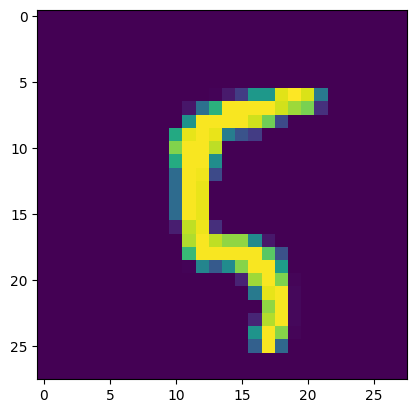

In [10]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [11]:
batch_size = 64
num_classes = 10
epochs = 5
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (5,5), padding='same',
activation='relu', input_shape=input_shape),
tf.keras.layers.Conv2D(32, (5,5), padding='same',
activation='relu'),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2D(64, (3,3), padding='same',
activation='relu'),
tf.keras.layers.Conv2D(64, (3,3), padding='same',
activation='relu'),
tf.keras.layers.MaxPool2D(strides=(2,2)),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08),
loss='categorical_crossentropy', metrics=['acc'])

In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.995):
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.1,
callbacks=[callbacks])

Epoch 1/5


844/844 [==============================] - 92s 106ms/step - loss: 0.2062 - acc: 0.9354 - val_loss: 0.0386 - val_acc: 0.9888
Epoch 2/5
844/844 [==============================] - 88s 104ms/step - loss: 0.0728 - acc: 0.9793 - val_loss: 0.0546 - val_acc: 0.9847
Epoch 3/5
844/844 [==============================] - 88s 105ms/step - loss: 0.0586 - acc: 0.9832 - val_loss: 0.0313 - val_acc: 0.9917
Epoch 4/5
844/844 [==============================] - 92s 109ms/step - loss: 0.0492 - acc: 0.9859 - val_loss: 0.0268 - val_acc: 0.9933
Epoch 5/5
844/844 [==============================] - 98s 116ms/step - loss: 0.0446 - acc: 0.9869 - val_loss: 0.0271 - val_acc: 0.9927


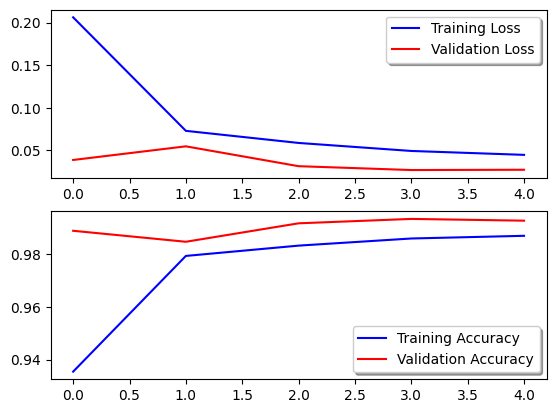

In [19]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.0214 - acc: 0.9928


In [23]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)


313/313 [==============================] - 6s 20ms/step


<Axes: >

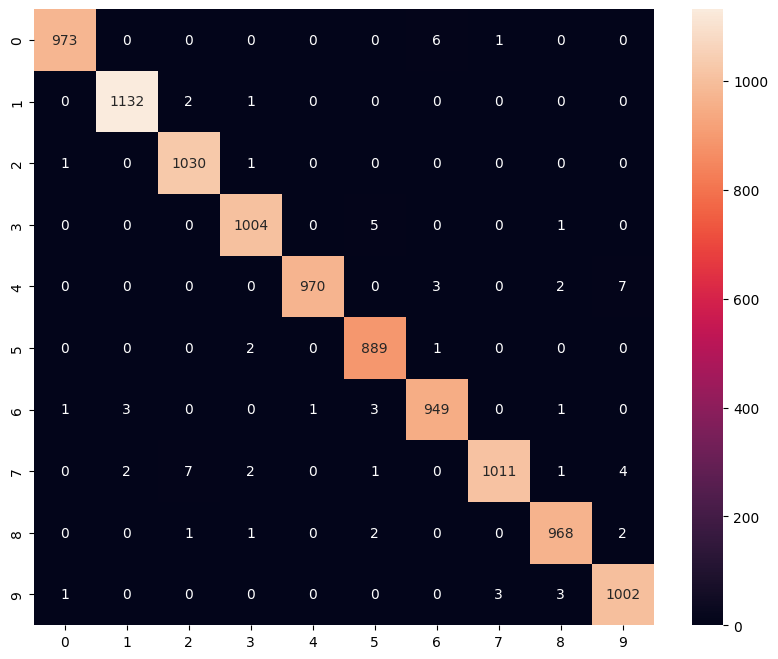

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')